# Практическое задание: Линейная регрессия и EDA

## Цель задания
В этом практическом задании вам предстоит выполнить полный анализ данных страховой компании, включая:
1. Разведочный анализ данных (EDA)
2. Визуализацию данных
3. Построение и оценку модели линейной регрессии

## Описание данных
Набор данных содержит информацию о страховых взносах и различных характеристиках клиентов:
- age: возраст
- sex: пол
- bmi: индекс массы тела
- children: количество детей
- smoker: статус курильщика
- region: регион проживания
- charges: страховые выплаты (целевая переменная)

## Задачи
1. Загрузка и первичный анализ данных
2. Очистка и предобработка данных
3. Разведочный анализ данных (EDA)
4. Статистический анализ
5. Подготовка признаков
6. Построение модели линейной регрессии
7. Оценка модели
8. Визуализация результатов

## Задание 1: Загрузка и первичный анализ данных

1. Загрузите библиотеки:
   - pandas для работы с данными
   - numpy для математических операций
   - matplotlib и seaborn для визуализации
   - scipy.stats для статистических тестов

2. Загрузите датасет 'insurance.csv'

3. Выполните первичный анализ данных:
   - Проверьте размерность данных
   - Выведите первые 5 строк
   - Проверьте типы данных
   - Проверьте наличие пропущенных значений
   - Выведите основные статистические характеристики

In [ ]:
from google.colab import files
uploaded = files.upload()

# --- Импорт необходимых библиотек ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройки отображения графиков
sns.set_theme()
plt.style.use('default')

# --- Загрузка данных ---
df = pd.read_csv('insurance.csv')

# --- Первичный анализ данных ---
print("Размерность датасета (строки, столбцы):")
print(df.shape)

print("\nПервые 5 строк датасета:")
print(df.head())

print("\nТипы данных:")
print(df.dtypes)

print("\nКоличество пропущенных значений:")
print(df.isnull().sum())

print("\nСтатистические характеристики числовых признаков:")
print(df.describe())

print("\nСтатистические характеристики категориальных признаков:")
print(df.describe(include='object'))


Saving insurance.csv to insurance.csv
Размерность датасета (строки, столбцы):
(1338, 7)

Первые 5 строк датасета:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Типы данных:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Количество пропущенных значений:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Статистические характеристики числовых признаков:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025  

## Задание 2: Очистка и предобработка данных

1. Проверьте данные на наличие выбросов:
   - Используйте boxplot для числовых переменных
   - Определите наличие выбросов с помощью IQR
   - Примите решение о методе обработки выбросов

2. Проверьте распределение категориальных переменных:
   - Подсчитайте количество уникальных значений
   - Постройте графики распределения

3. Проведите необходимую предобработку:
   - Обработайте выбросы (если необходимо)
   - Преобразуйте категориальные переменные
   - Сохраните предобработанные данные

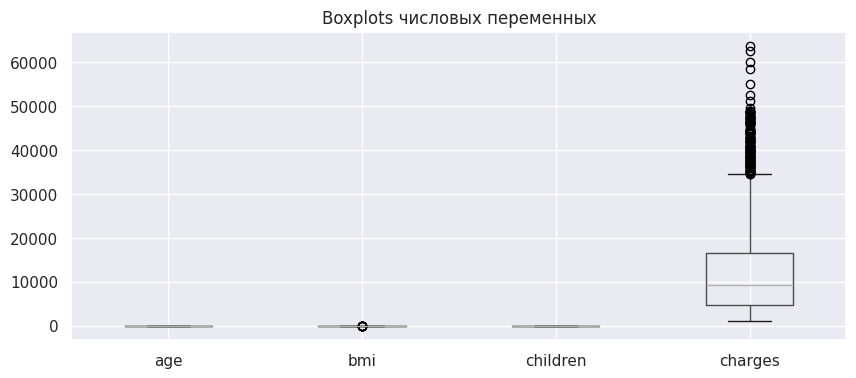

Выбросы по IQR:
age: 0 выбросов
bmi: 9 выбросов
children: 0 выбросов
charges: 139 выбросов

Выбросы оставлены без изменений.

sex (уникальных: 2):
sex
male      676
female    662
Name: count, dtype: int64


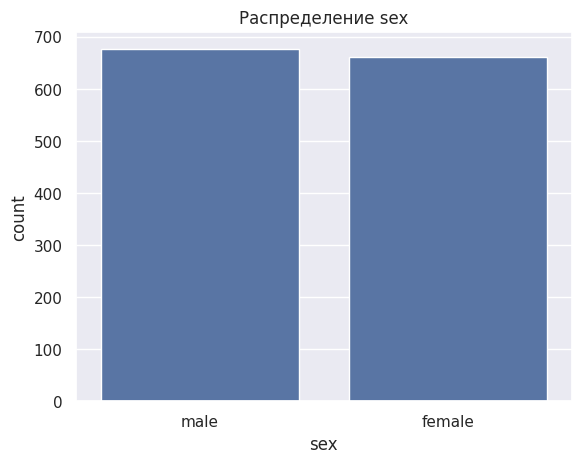


smoker (уникальных: 2):
smoker
no     1064
yes     274
Name: count, dtype: int64


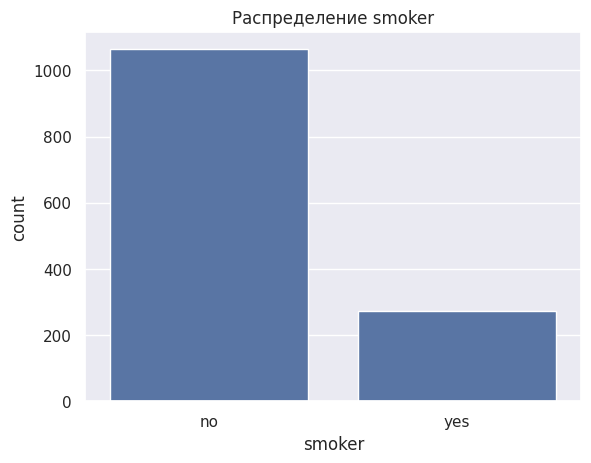


region (уникальных: 4):
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


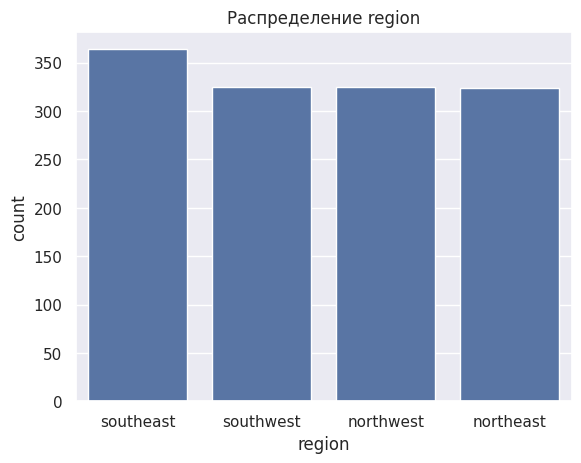


Готово! Сохранён файл insurance_preprocessed.csv
Размер: (1338, 9)


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()

nums = ['age', 'bmi', 'children', 'charges']
cats = ['sex', 'smoker', 'region']

# 1. Boxplot числовых переменных
df[nums].boxplot(figsize=(10,4))
plt.title("Boxplots числовых переменных")
plt.show()

# 2. IQR — проверка выбросов
def iqr_bounds(s, k=1.5):
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - k*IQR, Q3 + k*IQR

print("Выбросы по IQR:")
for col in nums:
    low, high = iqr_bounds(df[col])
    outliers = df[(df[col] < low) | (df[col] > high)]
    print(f"{col}: {outliers.shape[0]} выбросов")

# Выбор стратегии обработки выбросов
OUT = "keep"   # варианты: keep | winsorize | remove
df2 = df.copy()

if OUT == "winsorize":
    for c in nums:
        lo = df2[c].quantile(0.01)
        hi = df2[c].quantile(0.99)
        df2[c] = df2[c].clip(lo, hi)
    print("\nВыполнена винзоризация.")
elif OUT == "remove":
    drop_idx = []
    for c in nums:
        lo, hi = iqr_bounds(df2[c])
        drop_idx += df2[(df2[c] < lo) | (df2[c] > hi)].index.tolist()
    df2 = df2.drop(set(drop_idx)).reset_index(drop=True)
    print("\nСтроки с выбросами удалены.")
else:
    print("\nВыбросы оставлены без изменений.")

# 3. Категориальные переменные
for c in cats:
    print(f"\n{c} (уникальных: {df2[c].nunique()}):")
    print(df2[c].value_counts())
    sns.countplot(data=df2, x=c, order=df2[c].value_counts().index)
    plt.title(f"Распределение {c}")
    plt.show()

# 4. One-Hot Encoding + сохранение
df_final = pd.get_dummies(df2, drop_first=True)
df_final.to_csv("insurance_preprocessed.csv", index=False)

print("\nГотово! Сохранён файл insurance_preprocessed.csv")
print("Размер:", df_final.shape)


## Задание 3: Разведочный анализ данных (EDA)

1. Выполните анализ распределений:
   - Постройте гистограммы для числовых переменных
   - Проверьте нормальность распределений с помощью QQ-plots
   - Визуализируйте распределения с помощью KDE plots

2. Исследуйте взаимосвязи между переменными:
   - Постройте корреляционную матрицу
   - Создайте scatter plots для пар числовых переменных
   - Проанализируйте взаимосвязи с помощью box plots для категориальных переменных

3. Проведите анализ целевой переменной (charges):
   - Исследуйте её распределение
   - Проанализируйте зависимости с другими переменными
   - Проверьте наличие нелинейных связей

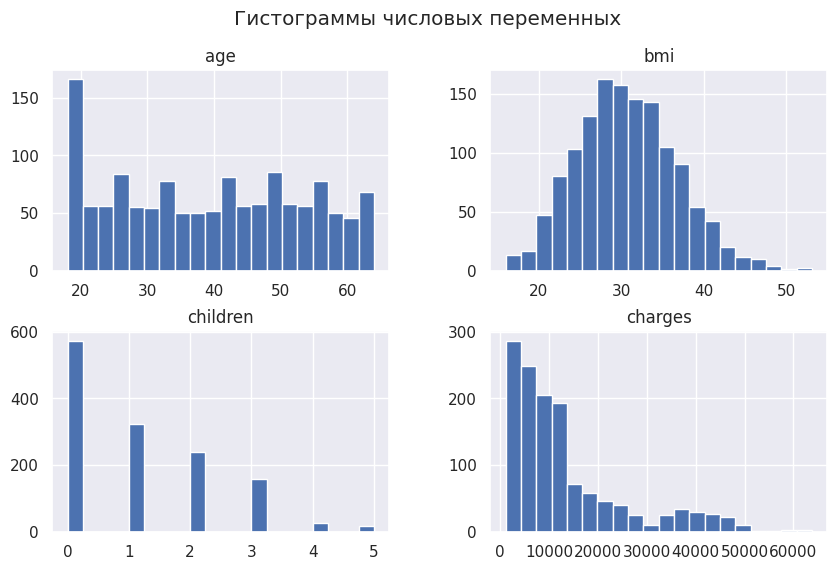

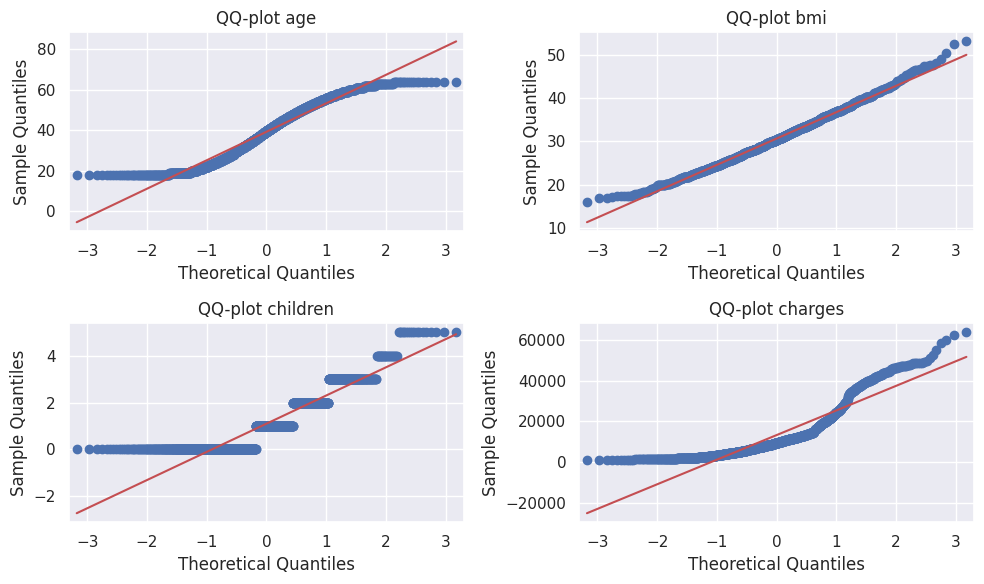

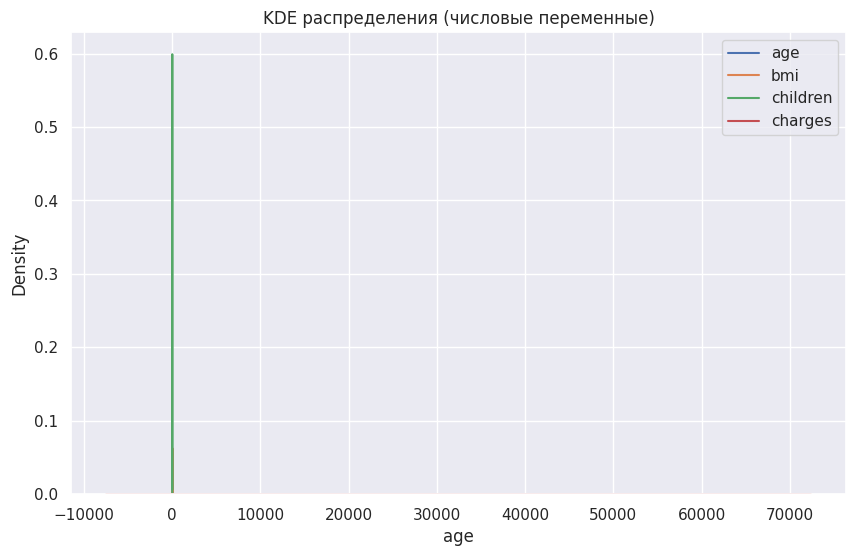

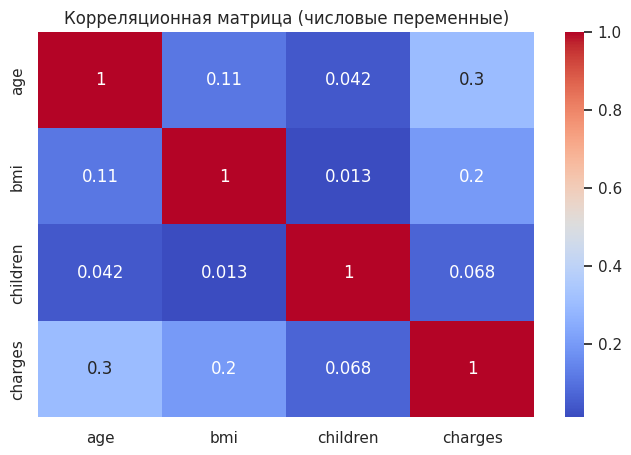

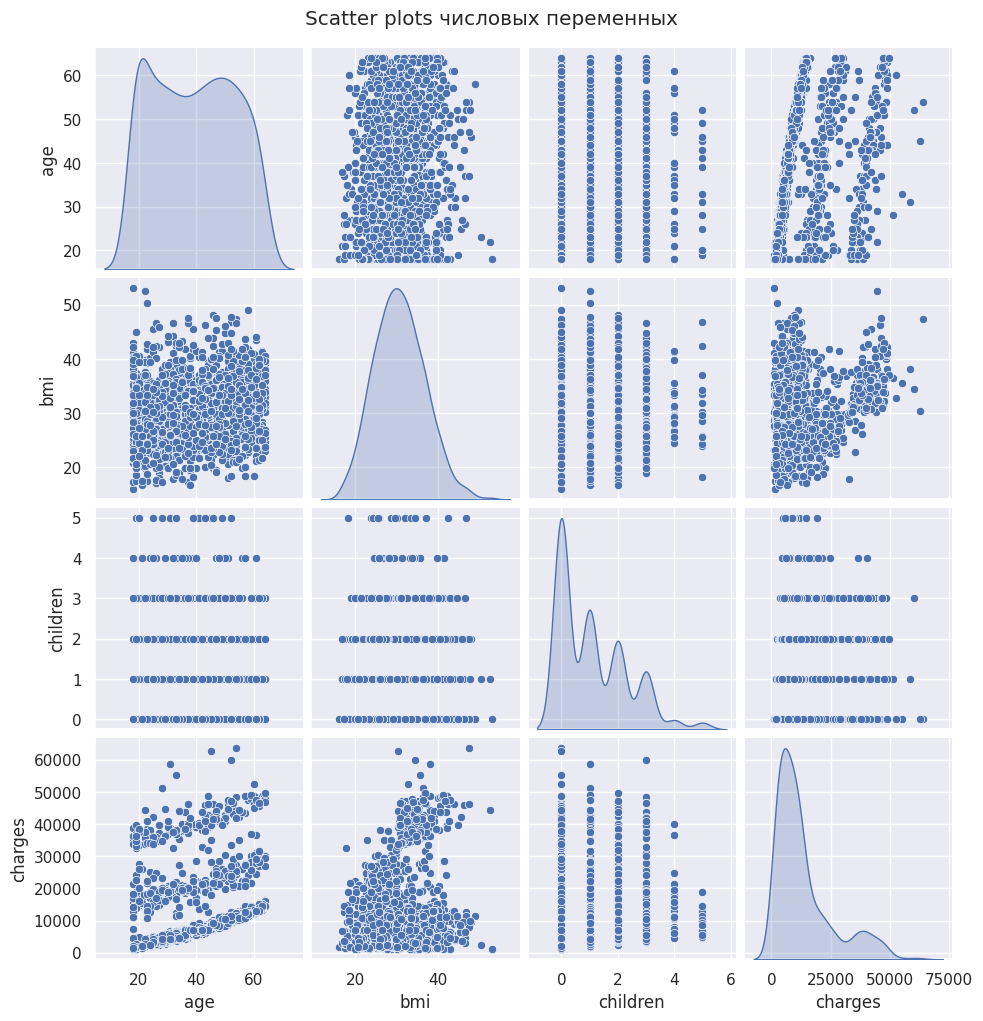

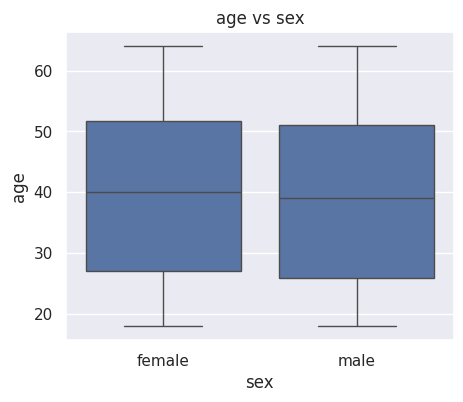

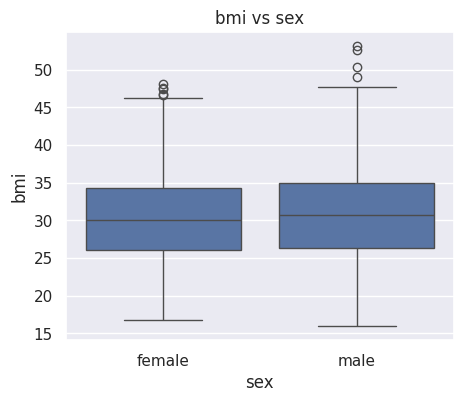

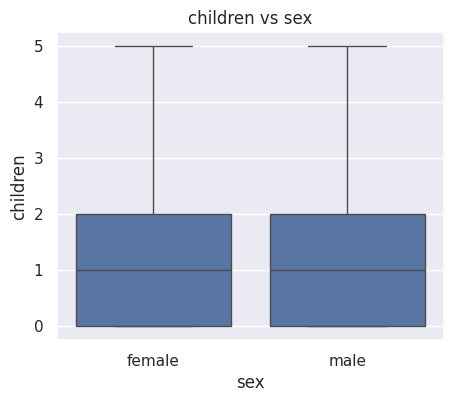

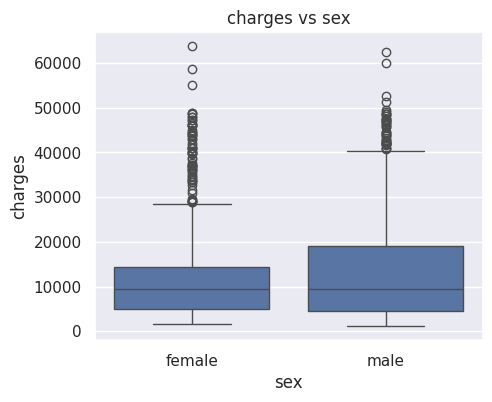

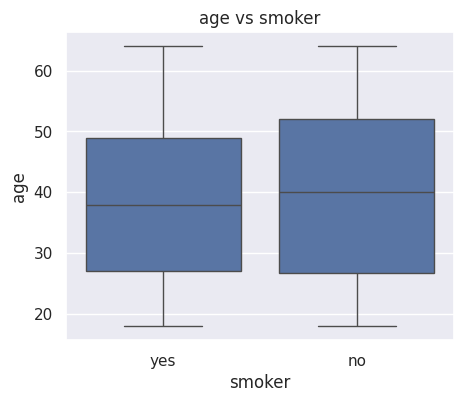

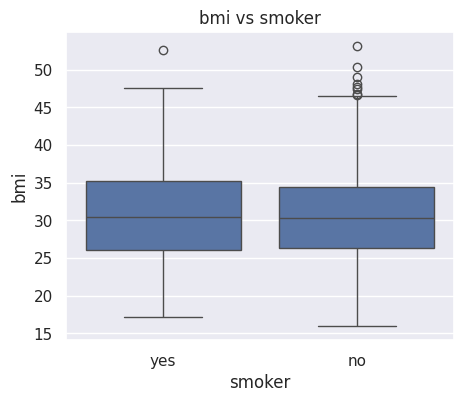

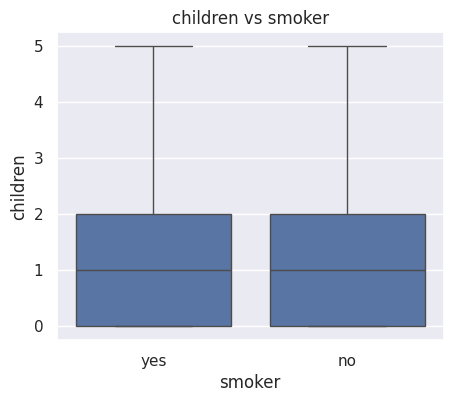

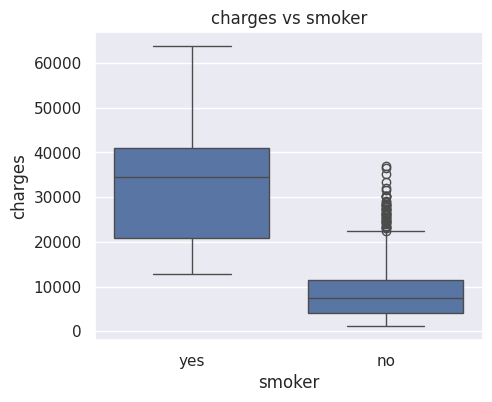

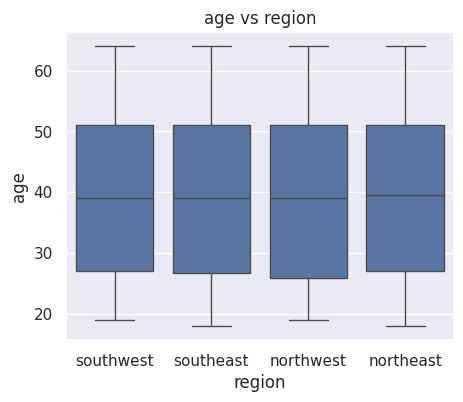

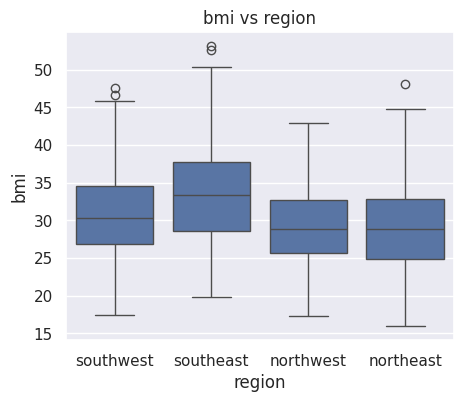

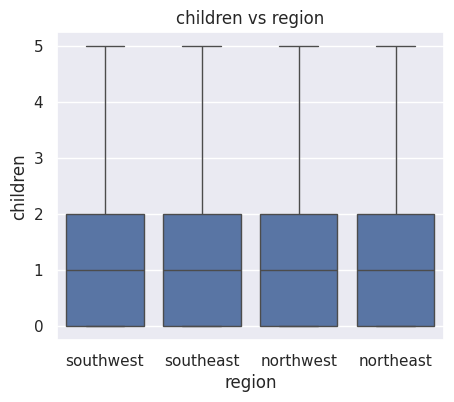

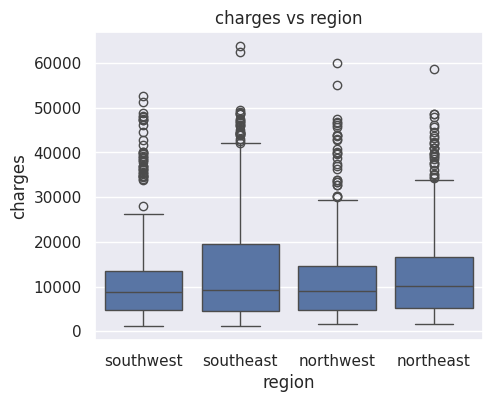

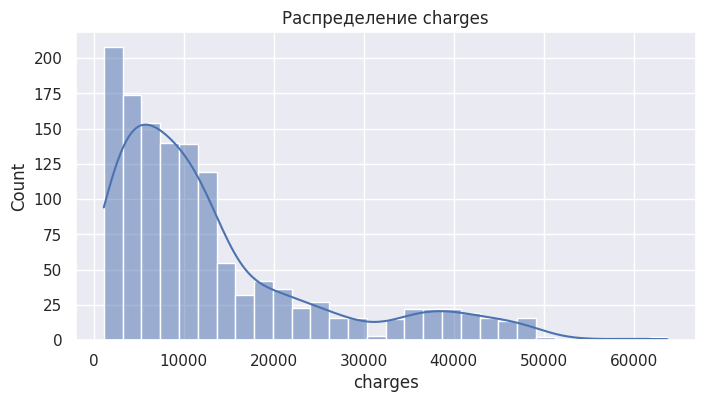

<Figure size 500x400 with 0 Axes>

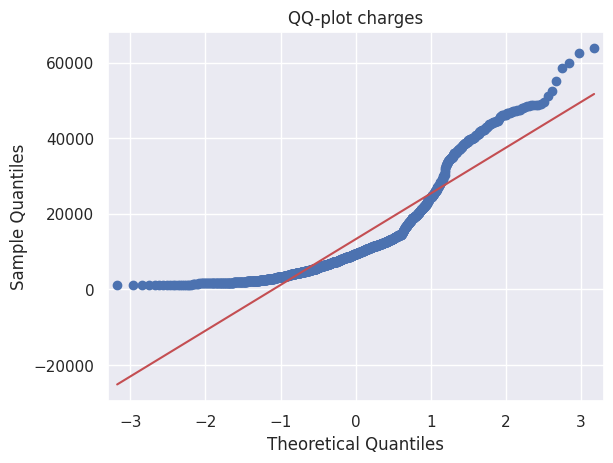

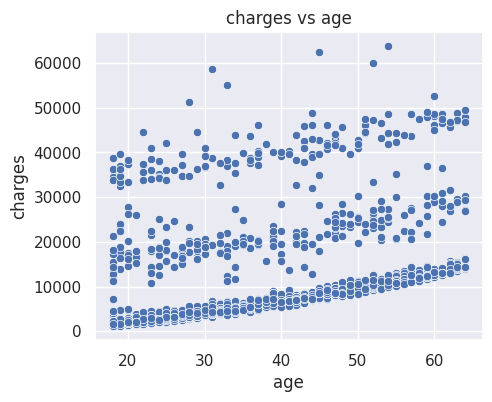

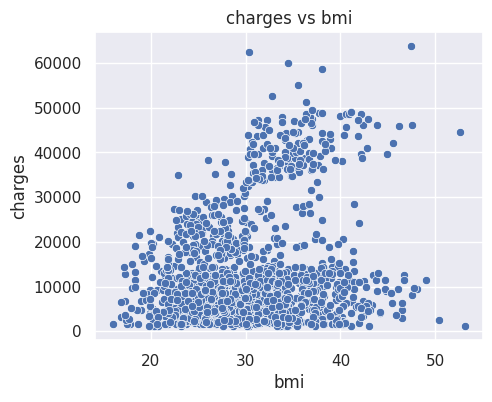

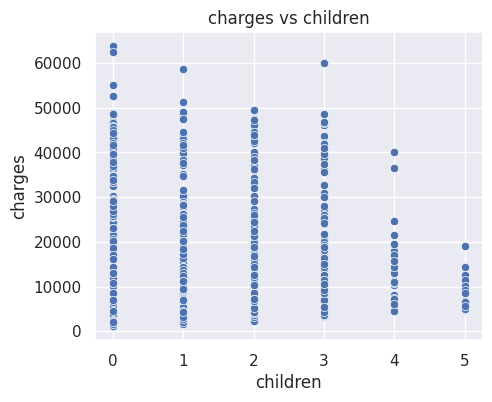

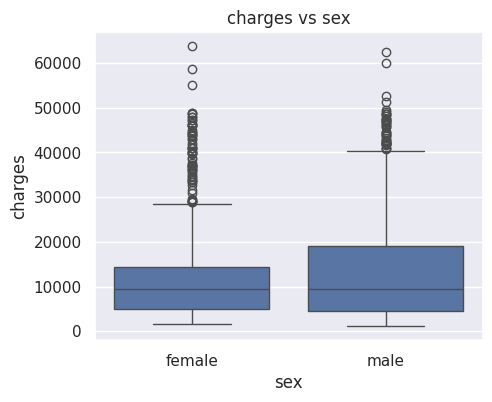

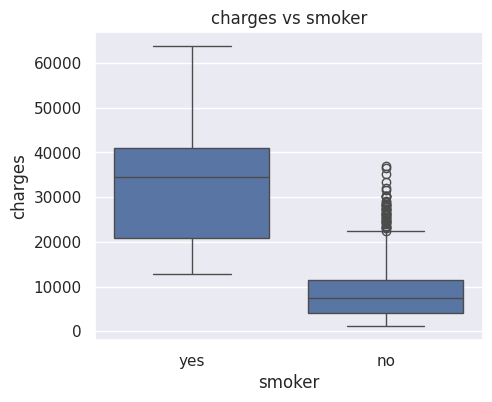

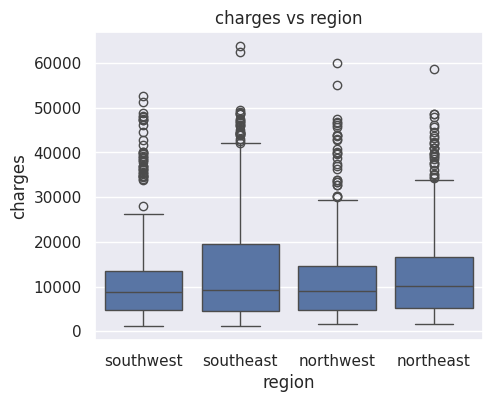

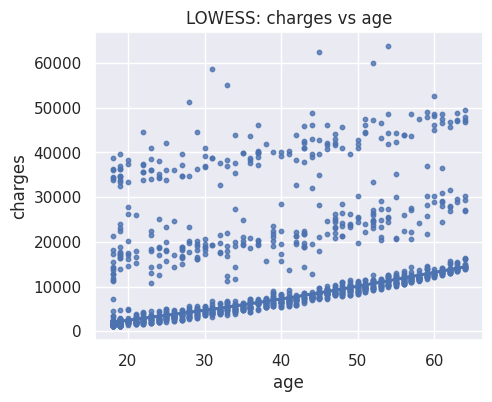

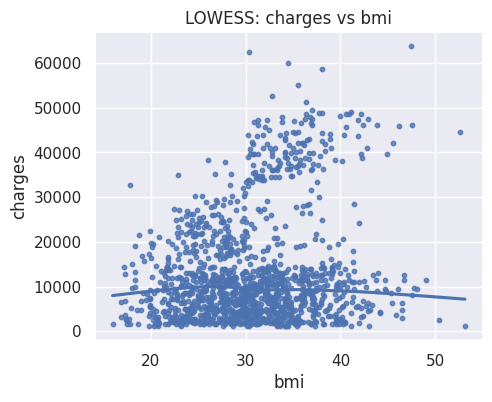

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
sns.set()

nums = ['age','bmi','children','charges']
cats = ['sex','smoker','region']

# 1. Анализ распределений

# Гистограммы
df[nums].hist(figsize=(10,6), bins=20)
plt.suptitle("Гистограммы числовых переменных")
plt.show()

# QQ-plots
import statsmodels.api as sm
plt.figure(figsize=(10,6))
for i,c in enumerate(nums,1):
    plt.subplot(2,2,i)
    sm.qqplot(df[c], line='s', ax=plt.gca())
    plt.title(f"QQ-plot {c}")
plt.tight_layout()
plt.show()

# KDE plots
plt.figure(figsize=(10,6))
for c in nums:
    sns.kdeplot(df[c], label=c)
plt.title("KDE распределения (числовые переменные)")
plt.legend()
plt.show()

# 2. Исследование взаимосвязей

# Корреляционная матрица
plt.figure(figsize=(8,5))
sns.heatmap(df[nums].corr(), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица (числовые переменные)")
plt.show()

# Scatter plots
sns.pairplot(df[nums], diag_kind='kde')
plt.suptitle("Scatter plots числовых переменных", y=1.02)
plt.show()

# Boxplots для категориальных vs числовые
for c in cats:
    for num in nums:
        plt.figure(figsize=(5,4))
        sns.boxplot(data=df, x=c, y=num)
        plt.title(f"{num} vs {c}")
        plt.show()

# 3. Анализ целевой переменной (charges)

# Распределение charges
plt.figure(figsize=(8,4))
sns.histplot(df['charges'], kde=True)
plt.title("Распределение charges")
plt.show()

# QQ-plot для charges
plt.figure(figsize=(5,4))
sm.qqplot(df['charges'], line='s')
plt.title("QQ-plot charges")
plt.show()

# Взаимосвязи charges с числовыми
for num in ['age','bmi','children']:
    plt.figure(figsize=(5,4))
    sns.scatterplot(data=df, x=num, y='charges')
    plt.title(f"charges vs {num}")
    plt.show()

# Boxplot: charges vs категориальные
for c in cats:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df, x=c, y='charges')
    plt.title(f"charges vs {c}")
    plt.show()

# Проверка нелинейности: scatter + LOWESS
for num in ['age','bmi']:
    plt.figure(figsize=(5,4))
    sns.regplot(data=df, x=num, y='charges', lowess=True, scatter_kws={'s':10})
    plt.title(f"LOWESS: charges vs {num}")
    plt.show()


## Задание 4: Статистический анализ

1. Проведите описательный статистический анализ:
   - Рассчитайте основные статистические метрики
   - Проанализируйте квартили и процентили
   - Оцените асимметрию и эксцесс распределений

2. Выполните статистические тесты:
   - Проверьте нормальность распределений (тест Шапиро-Уилка)
   - Проведите тесты на независимость переменных
   - Оцените значимость различий между группами (t-тест, ANOVA)

3. Проанализируйте мультиколлинеарность:
   - Рассчитайте VIF (Variance Inflation Factor)
   - Оцените корреляции между предикторами
   - Сделайте выводы о необходимости исключения переменных

Basic stats (count, mean, std, min, 25%, 50%, 75%, max):


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801



Quartiles and selected percentiles:


,0.01,0.05,0.25,0.50,0.75,0.95,0.99
age,18.00000,18.0000,27.00000,39.000,51.000000,62.000000,64.000000
bmi,17.89515,21.2560,26.29625,30.400,34.693750,41.106000,46.407900
children,0.00000,0.0000,0.00000,1.000,2.000000,3.000000,5.000000
charges,1252.97273,1757.7534,4740.28715,9382.033,16639.912515,41181.827787,48537.480726



Skewness and Kurtosis:


,skewness,kurtosis
age,0.055673,-1.245088
bmi,0.284047,-0.050732
children,0.938380,0.202454
charges,1.515880,1.606299



Shapiro-Wilk normality test (if n>500, sample 500):
age: W=0.9487, p=3.8368e-12 (sampled 500)
bmi: W=0.9929, p=1.8642e-02 (sampled 500)
children: W=0.8203, p=3.1123e-23 (sampled 500)
charges: W=0.8091, p=7.2277e-24 (sampled 500)

Independence tests (chi-square) for categorical pairs:
sex vs smoker: chi2=7.39, p=6.5481e-03, dof=1
sex vs region: chi2=0.44, p=9.3289e-01, dof=3
smoker vs region: chi2=7.34, p=6.1720e-02, dof=3

Group comparisons for numeric variables:

T-test (Welch) for sex (female vs male):
  age: t=0.7625, p=4.4591e-01
  bmi: t=-1.6970, p=8.9924e-02
  children: t=-0.6276, p=5.3039e-01
  charges: t=-2.1009, p=3.5841e-02

T-test (Welch) for smoker (yes vs no):
  age: t=-0.9210, p=3.5759e-01
  bmi: t=0.1335, p=8.9385e-01
  children: t=0.2891, p=7.7262e-01
  charges: t=32.7519, p=5.8895e-103

ANOVA for region:
  age: F=0.0798, p=9.7099e-01
  bmi: F=39.4951, p=1.8818e-24
  children: F=0.7175, p=5.4155e-01
  charges: F=2.9696, p=3.0893e-02

Correlation matrix (pearson) for nu

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


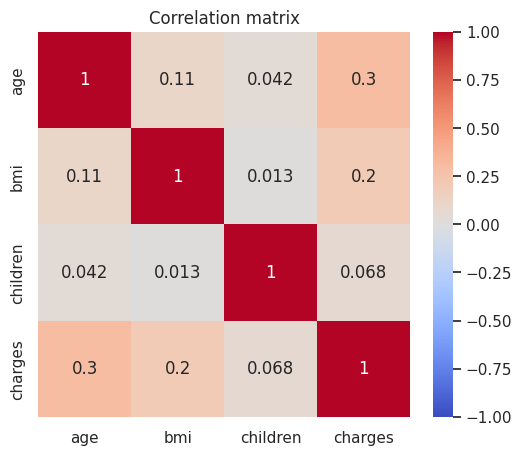


Scatter plots for numeric pairs:


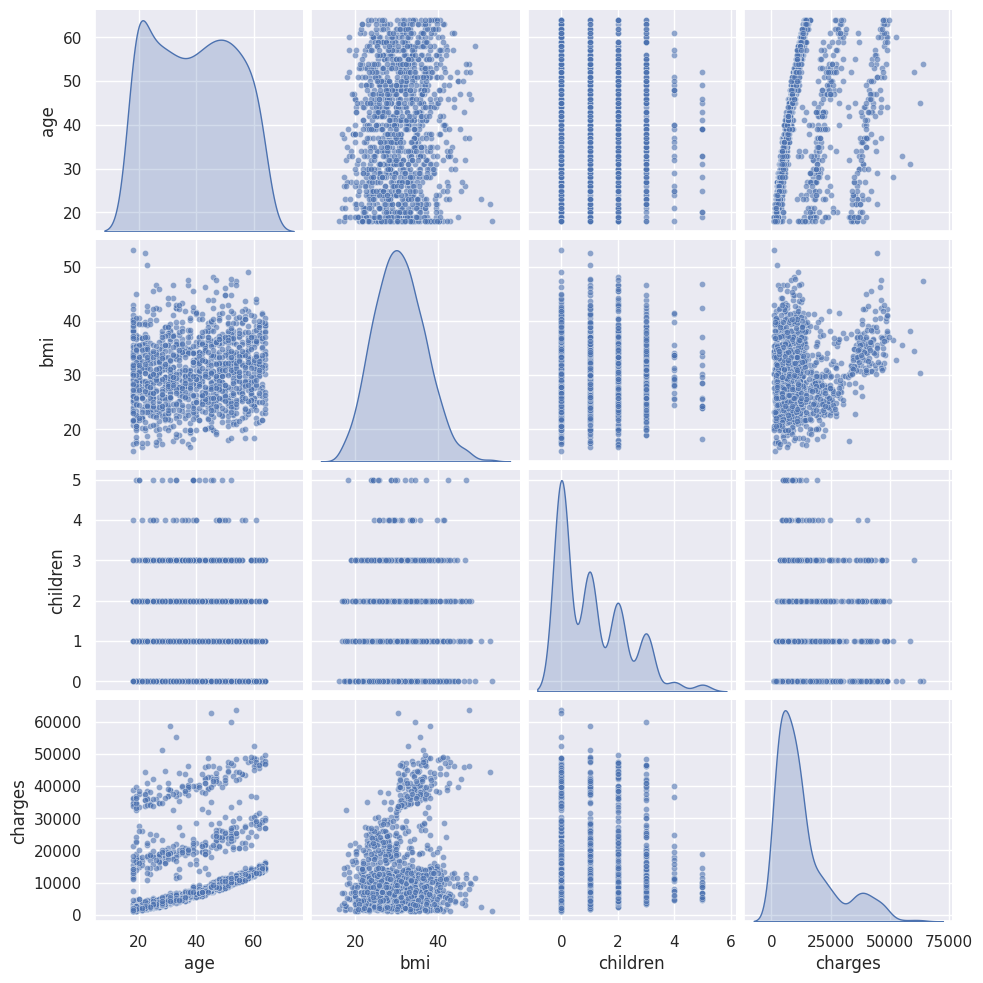


Boxplots of numeric by categorical variables:


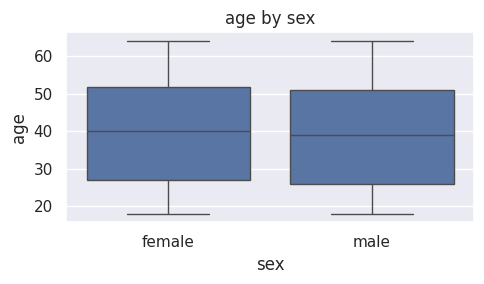

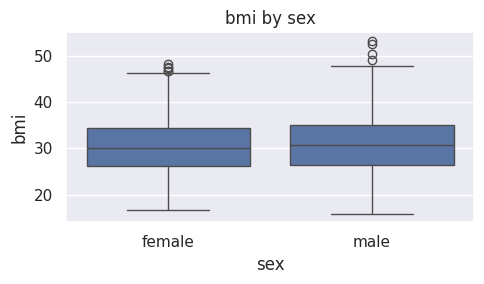

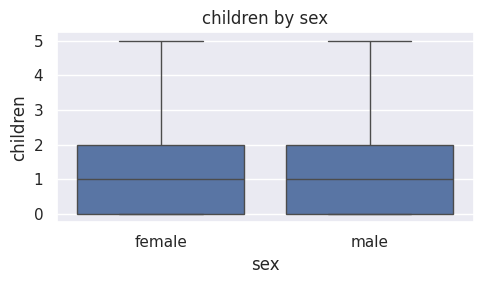

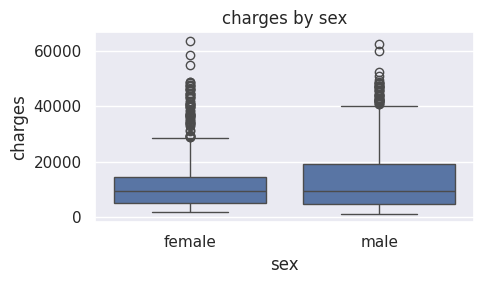

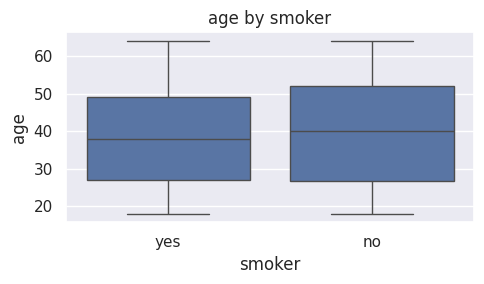

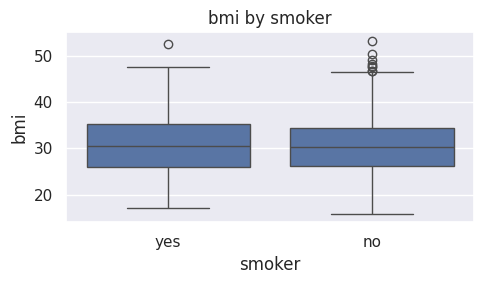

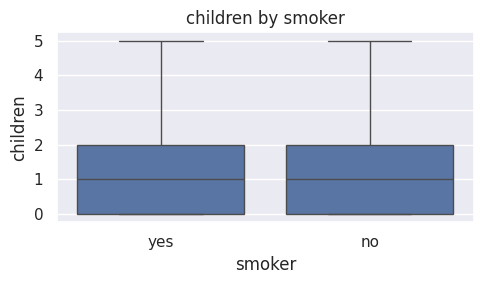

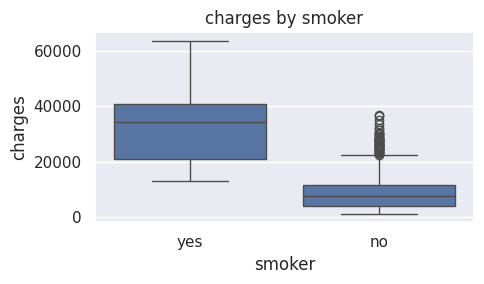

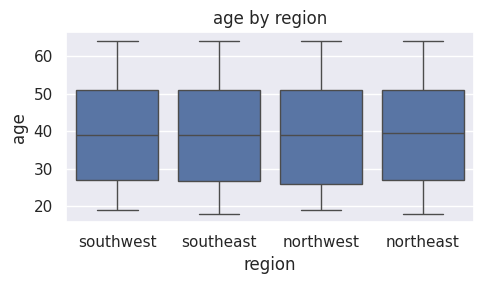

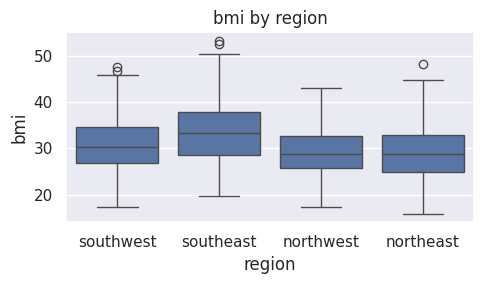

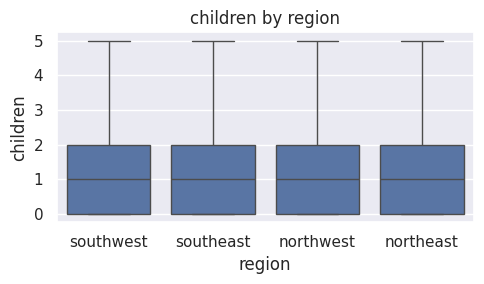

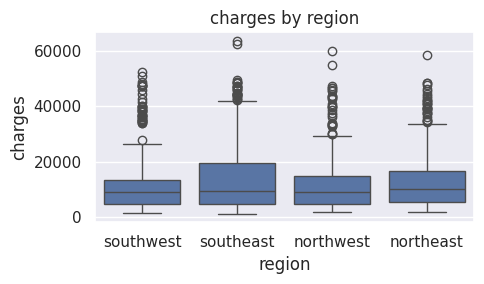


Nonlinear relationships check: LOWESS for age and bmi vs charges


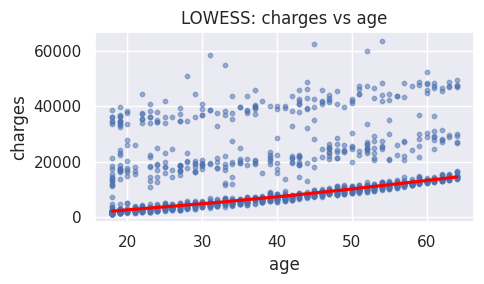

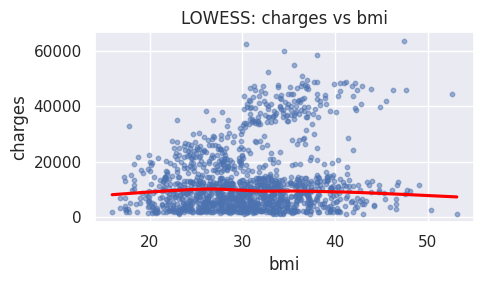


VIF (Variance Inflation Factor) calculation:


,feature,VIF
0,age,1.013816
1,bmi,1.012152
2,children,1.001874


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

nums = ['age', 'bmi', 'children', 'charges']
cats = ['sex', 'smoker', 'region']

print("Basic stats (count, mean, std, min, 25%, 50%, 75%, max):")
display(df[nums].describe().T)

print("\nQuartiles and selected percentiles:")
percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
display(df[nums].quantile(percentiles).T)

print("\nSkewness and Kurtosis:")
sk_kurt = pd.DataFrame({
    'skewness': df[nums].skew(),
    'kurtosis': df[nums].kurt()
})
display(sk_kurt)

print("\nShapiro-Wilk normality test (if n>500, sample 500):")
for col in nums:
    series = df[col].dropna()
    if series.shape[0] > 500:
        series_sample = series.sample(500, random_state=42)
    else:
        series_sample = series
    stat, p = stats.shapiro(series_sample)
    print(f"{col}: W={stat:.4f}, p={p:.4e} {'(sampled 500)' if series.shape[0]>500 else ''}")

print("\nIndependence tests (chi-square) for categorical pairs:")
from itertools import combinations
for a, b in combinations(cats, 2):
    ct = pd.crosstab(df[a], df[b])
    chi2, p, dof, exp = stats.chi2_contingency(ct)
    print(f"{a} vs {b}: chi2={chi2:.2f}, p={p:.4e}, dof={dof}")

print("\nGroup comparisons for numeric variables:")
# t-test for binary categorical (sex, smoker), ANOVA for region (3+ groups)
binary_cats = [c for c in cats if df[c].nunique() == 2]
multi_cats = [c for c in cats if df[c].nunique() > 2]
for cat in binary_cats:
    vals = df[cat].unique().tolist()
    g1 = df[df[cat] == vals[0]][nums]
    g2 = df[df[cat] == vals[1]][nums]
    print(f"\nT-test (Welch) for {cat} ({vals[0]} vs {vals[1]}):")
    for col in nums:
        stat, p = stats.ttest_ind(g1[col].dropna(), g2[col].dropna(), equal_var=False)
        print(f"  {col}: t={stat:.4f}, p={p:.4e}")
for cat in multi_cats:
    groups = [df[df[cat] == lev][nums] for lev in df[cat].unique()]
    print(f"\nANOVA for {cat}:")
    for col in nums:
        samples = [g[col].dropna() for g in groups]
        try:
            f, p = stats.f_oneway(*samples)
            print(f"  {col}: F={f:.4f}, p={p:.4e}")
        except Exception as e:
            print(f"  {col}: ANOVA error: {e}")

print("\nCorrelation matrix (pearson) for numeric variables:")
corr = df[nums].corr()
display(corr)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

print("\nScatter plots for numeric pairs:")
sns.pairplot(df[nums], diag_kind='kde', plot_kws={'s':20, 'alpha':0.6})
plt.show()

print("\nBoxplots of numeric by categorical variables:")
for c in cats:
    for n in nums:
        plt.figure(figsize=(5,3))
        sns.boxplot(x=df[c], y=df[n])
        plt.title(f"{n} by {c}")
        plt.tight_layout()
        plt.show()

print("\nNonlinear relationships check: LOWESS for age and bmi vs charges")
for x in ['age', 'bmi']:
    plt.figure(figsize=(5,3))
    sns.regplot(x=df[x], y=df['charges'], lowess=True, scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"LOWESS: charges vs {x}")
    plt.tight_layout()
    plt.show()

print("\nVIF (Variance Inflation Factor) calculation:")
# prepare design matrix for VIF: use numeric + one-hot encoded cats (without target)
if 'df_final' in globals():
    X_vif = df_final.drop(columns=['charges']) if 'charges' in df_final.columns else df_final.copy()
else:
    X_vif = pd.get_dummies(df.drop(columns=['charges']), drop_first=True)
# ensure numeric
X_vif = X_vif.select_dtypes(include=[np.number]).dropna(axis=1, how='all')
X_vif_const = sm.add_constant(X_vif)
vif_data = pd.DataFrame({
    'feature': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif_const.values, i+1) for i in range(len(X_vif.columns))]
})
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)
display(vif_data)


## Задание 5: Подготовка признаков

1. Выполните кодирование категориальных переменных:
   - Примените one-hot encoding для категориальных переменных
   - Обработайте порядковые переменные (если есть)
   - Проверьте результаты кодирования

2. Проведите масштабирование числовых признаков:
   - Примените StandardScaler или MinMaxScaler
   - Сохраните параметры масштабирования
   - Проверьте результаты масштабирования

3. Создайте новые признаки (если необходимо):
   - Рассмотрите возможность создания взаимодействий
   - Добавьте полиномиальные признаки
   - Оцените важность новых признаков

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import pandas as pd
import numpy as np

df_feat = df.copy()

cat_cols = ['sex','smoker','region']
num_cols = ['age','bmi','children','charges']

df_encoded = pd.get_dummies(df_feat, columns=cat_cols, drop_first=True)

ordinal_cols = []
# если появятся порядковые признаки — обработать вручную

print("После кодирования:")
print(df_encoded.head())

scaler = StandardScaler()
scaled = scaler.fit_transform(df_encoded[num_cols])
df_scaled = df_encoded.copy()
for i,col in enumerate(num_cols):
    df_scaled[col] = scaled[:,i]

print("\nПосле масштабирования:")
print(df_scaled[num_cols].head())

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_feats = poly.fit_transform(df_scaled[num_cols])

poly_names = poly.get_feature_names_out(num_cols)
df_poly = df_scaled.copy()
df_poly[poly_names] = poly_feats

print("\nПризнаки с полиномиальными взаимодействиями:")
print(df_poly.head())

df_poly.to_csv("insurance_features_prepared.csv", index=False)
print("\nСохранено в insurance_features_prepared.csv")


После кодирования:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

После масштабирования:
        age       bmi  children   charges
0 -1.438764 -0.453320 -0.908614  0.298584
1 -1.509965  0.509621 -0.078767 -0.953689
2 -0.797954  0.383307  1.580926 -0.728675
3 -0.441948 -1.305531 -0.908614  0.719843
4 -0.513149 -0.29255

## Задание 6: Построение модели линейной регрессии

1. Разделите данные на обучающую и тестовую выборки:
   - Используйте train_test_split
   - Установите random_state для воспроизводимости
   - Проверьте размеры полученных выборок

2. Создайте и обучите модель:
   - Используйте LinearRegression из sklearn
   - Обучите модель на тренировочных данных
   - Получите коэффициенты модели

3. Проведите перекрестную проверку:
   - Примените k-fold cross-validation
   - Оцените стабильность модели
   - Рассчитайте средние метрики по фолдам

In [ ]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# выбор доступного датасета
for cand in ('df_poly','df_final','df_encoded','df_proc','df'):
    if cand in globals():
        D = globals()[cand].copy()
        break
else:
    raise NameError("Нет DataFrame: создайте df_final или df_poly или df_encoded или df_proc или df.")

if 'charges' not in D.columns:
    raise KeyError("Целевая колонка 'charges' не найдена.")

X = D.drop(columns=['charges'])
y = D['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test  = pipeline.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test,  y_pred_test)

print(f"Train RMSE: {rmse_train:.3f}, Train R2: {r2_train:.4f}")
print(f"Test  RMSE: {rmse_test:.3f},  Test R2: {r2_test:.4f}")

lr = pipeline.named_steps['linearregression']
coef_df = pd.DataFrame({'feature': X.columns, 'coef': lr.coef_})
coef_df = coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index)
print("\nTop coefficients:")
print(coef_df.head(10))

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
mse_scores = -cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)

print(f"\nCross-val R2: mean={r2_scores.mean():.4f}, std={r2_scores.std():.4f}")
print(f"Cross-val RMSE: mean={rmse_scores.mean():.3f}, std={rmse_scores.std():.3f}")

y_cv_pred = cross_val_predict(pipeline, X, y, cv=kf)
cv_rmse = np.sqrt(mean_squared_error(y, y_cv_pred))
print(f"\nOverall CV RMSE: {cv_rmse:.3f}")


Train shape: (1070, 18) Test shape: (268, 18)
Train RMSE: 0.309, Train R2: 0.9031
Test  RMSE: 0.284,  Test R2: 0.9239

Top coefficients:
             feature      coef
17         charges^2  0.601088
4         smoker_yes  0.419637
0                age  0.297841
11       age charges -0.199821
8              age^2  0.089718
2           children  0.077787
7   region_southwest -0.039886
12             bmi^2 -0.027927
6   region_southeast -0.022351
5   region_northwest -0.019919

Cross-val R2: mean=0.8992, std=0.0266
Cross-val RMSE: mean=0.312, std=0.028

Overall CV RMSE: 0.313


## Задание 7: Оценка модели и диагностика

1. Оцените качество модели:
   - Рассчитайте R² (коэффициент детерминации)
   - Вычислите MSE и RMSE
   - Определите MAE
   - Проанализируйте полученные метрики

2. Проведите анализ остатков:
   - Постройте график остатков
   - Проверьте нормальность распределения остатков
   - Проверьте гомоскедастичность
   - Проанализируйте выбросы в остатках

3. Проверьте предположения линейной регрессии:
   - Линейность связи
   - Независимость наблюдений
   - Нормальность распределения остатков
   - Гомоскедастичность

Оценка качества модели:
R²  = 0.9239
MSE = 0.081
RMSE= 0.284
MAE = 0.164


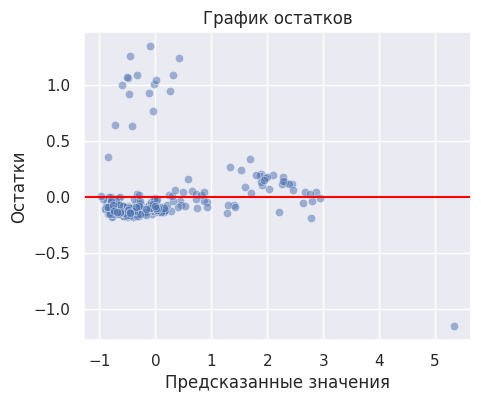

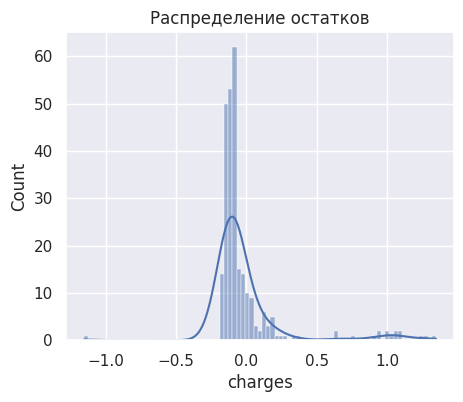

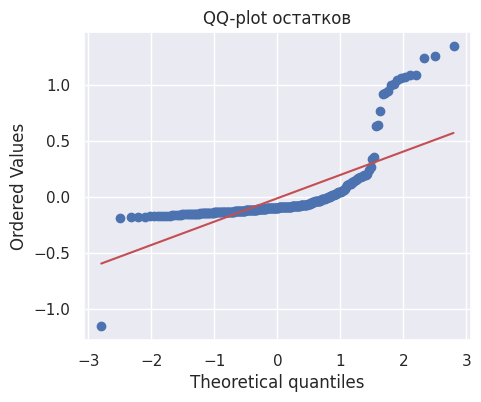

Shapiro–Wilk for residuals: W=0.5396, p=5.7454e-26
Breusch–Pagan: stat=26.827, p=8.2303e-02


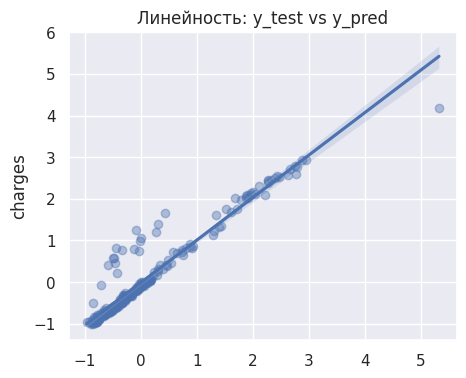

Durbin–Watson (независимость остатков): 2.137

Выводы:
- Линейность: оценивается по regplot и остаткам
- Независимость: Durbin–Watson близок к 2 → норм
- Нормальность остатков: смотрим QQ-plot + Shapiro
- Гомоскедастичность: Breusch–Pagan p>0.05 желателен


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
sns.set()

# Предсказания
y_pred = pipeline.predict(X_test)
residuals = y_test - y_pred

# Метрики
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Оценка качества модели:")
print(f"R²  = {r2:.4f}")
print(f"MSE = {mse:.3f}")
print(f"RMSE= {rmse:.3f}")
print(f"MAE = {mae:.3f}")

# Анализ остатков

plt.figure(figsize=(5,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.title("График остатков")
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")
plt.show()

plt.figure(figsize=(5,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-plot остатков")
plt.show()

# Тест Шапиро–Уилка для остатков
stat, p = stats.shapiro(residuals.sample(500) if len(residuals)>500 else residuals)
print(f"Shapiro–Wilk for residuals: W={stat:.4f}, p={p:.4e}")

# Гомоскедастичность (Breusch–Pagan)
import statsmodels.api as sm
import statsmodels.stats.api as sms

X_sm = sm.add_constant(X_test)
bp_stat, bp_p, _, _ = sms.het_breuschpagan(residuals, X_sm)
print(f"Breusch–Pagan: stat={bp_stat:.3f}, p={bp_p:.4e}")

# Проверка предположений линейной регрессии

plt.figure(figsize=(5,4))
sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.4})
plt.title("Линейность: y_test vs y_pred")
plt.show()

dw = sm.stats.durbin_watson(residuals)
print(f"Durbin–Watson (независимость остатков): {dw:.3f}")

print("\nВыводы:")
print("- Линейность: оценивается по regplot и остаткам")
print("- Независимость: Durbin–Watson близок к 2 → норм")
print("- Нормальность остатков: смотрим QQ-plot + Shapiro")
print("- Гомоскедастичность: Breusch–Pagan p>0.05 желателен")


## Задание 8: Визуализация результатов

1. Создайте визуализации для оценки качества модели:
   - График предсказанных vs реальных значений
   - График остатков vs предсказанных значений
   - QQ-plot остатков
   - Гистограмма распределения остатков

2. Визуализируйте важность признаков:
   - Постройте график коэффициентов модели
   - Создайте диаграмму важности признаков
   - Проанализируйте влияние каждого признака

3. Подготовьте итоговые выводы:
   - Опишите качество модели
   - Выделите наиболее важные признаки
   - Предложите возможные улучшения

## Бонусное задание

1. Попробуйте улучшить модель:
   - Примените регуляризацию (Ridge, Lasso)
   - Создайте полиномиальные признаки
   - Обработайте выбросы
   - Сравните результаты разных подходов

2. Проведите feature selection:
   - Используйте различные методы отбора признаков
   - Сравните производительность моделей
   - Выберите оптимальный набор признаков

R2=0.9239  RMSE=0.28  MAE=0.16


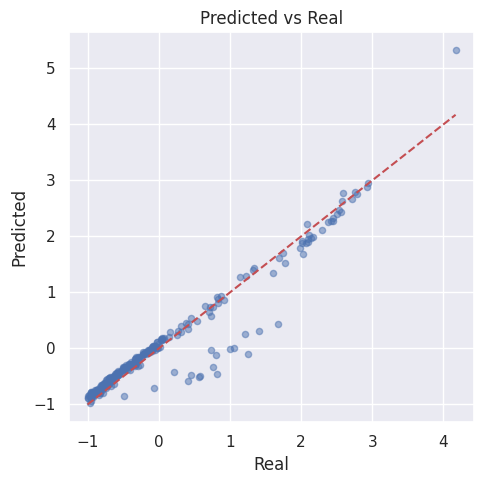

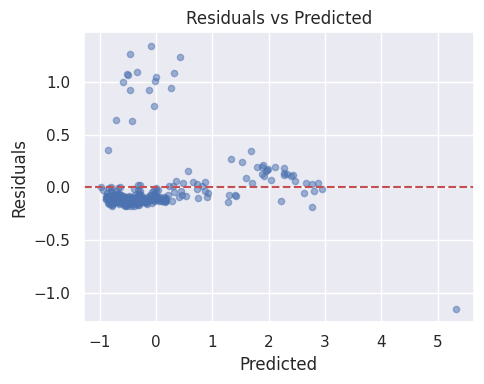

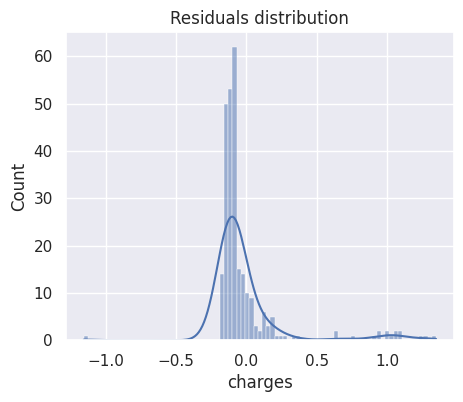

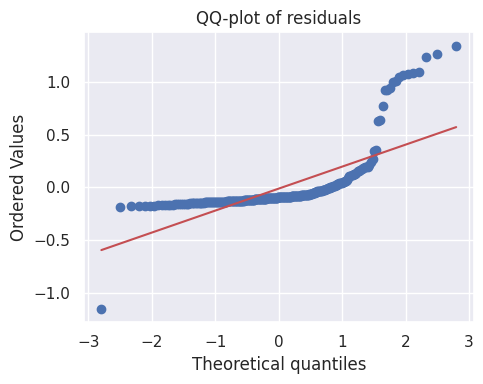

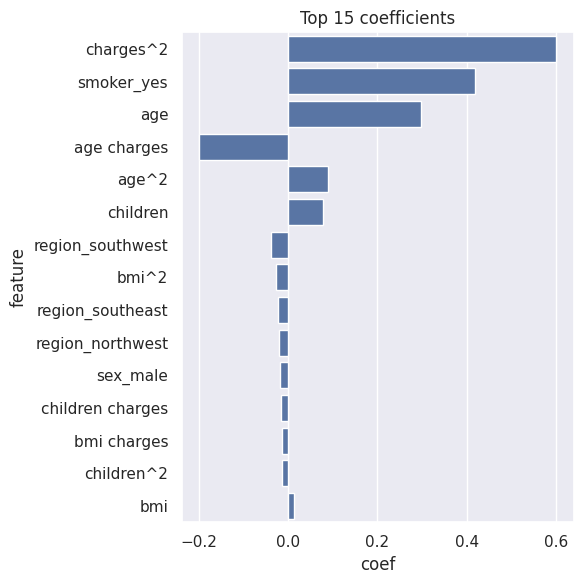

Top features by absolute coefficient:


,feature,coef
17,charges^2,0.601088
4,smoker_yes,0.419637
0,age,0.297841
11,age charges,-0.199821
8,age^2,0.089718
2,children,0.077787
7,region_southwest,-0.039886
12,bmi^2,-0.027927
6,region_southeast,-0.022351
5,region_northwest,-0.019919


Linear: R2=0.9239, RMSE=0.28
Ridge: R2=0.5012, RMSE=0.73
Lasso: R2=0.4897, RMSE=0.74


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


Poly deg2: R2=0.9268, RMSE=0.28
Selected features count: 11
Selected features: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southwest', 'age^2', 'age charges', 'bmi^2', 'children charges', 'charges^2']
Selected-features model: R2=0.9219, RMSE=0.29
Suggestions: compare regularized models (Ridge/Lasso), try poly features selectively, consider handling outliers or log-transforming charges, and use feature selection if multicollinearity or many features reduce stability.


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

sns.set()

y_pred = pipeline.predict(X_test)
resid = y_test - y_pred

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2={r2:.4f}  RMSE={rmse:.2f}  MAE={mae:.2f}")

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real"); plt.ylabel("Predicted"); plt.title("Predicted vs Real")
plt.tight_layout(); plt.show()

plt.figure(figsize=(5,4))
plt.scatter(y_pred, resid, alpha=0.5, s=20)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted"); plt.ylabel("Residuals"); plt.title("Residuals vs Predicted")
plt.tight_layout(); plt.show()

plt.figure(figsize=(5,4))
sns.histplot(resid, kde=True)
plt.title("Residuals distribution"); plt.show()

import scipy.stats as stats
plt.figure(figsize=(5,4))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("QQ-plot of residuals"); plt.tight_layout(); plt.show()

coef = pipeline.named_steps['linearregression'].coef_
feat_names = X.columns
coef_df = pd.DataFrame({'feature': feat_names, 'coef': coef})
coef_df['abs'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs', ascending=False)
plt.figure(figsize=(6,6))
sns.barplot(x='coef', y='feature', data=coef_df.head(15))
plt.title("Top 15 coefficients"); plt.tight_layout(); plt.show()

print("Top features by absolute coefficient:")
display(coef_df.head(10)[['feature','coef']])

alphas = np.logspace(-3,3,50)
ridge = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)
lasso = LassoCV(alphas=None, cv=5, max_iter=5000).fit(X_train, y_train)

for name, model in [('Linear', pipeline.named_steps['linearregression']),
                    ('Ridge', ridge), ('Lasso', lasso)]:
    if name=='Linear':
        preds = pipeline.predict(X_test)
    else:
        scaler = StandardScaler().fit(X_train)
        preds = model.predict(scaler.transform(X_test))
    rm = np.sqrt(mean_squared_error(y_test, preds))
    r = r2_score(y_test, preds)
    print(f"{name}: R2={r:.4f}, RMSE={rm:.2f}")

poly_pipe = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), StandardScaler(), LinearRegression())
poly_pipe.fit(X_train, y_train)
y_poly = poly_pipe.predict(X_test)
print("Poly deg2: R2={:.4f}, RMSE={:.2f}".format(r2_score(y_test, y_poly), np.sqrt(mean_squared_error(y_test, y_poly))))

sel = SelectFromModel(LassoCV(cv=5, max_iter=5000)).fit(StandardScaler().fit_transform(X_train), y_train)
mask = sel.get_support()
selected_features = X.columns[mask]
print("Selected features count:", mask.sum())
print("Selected features:", list(selected_features))

if mask.sum()>0:
    Xs_train = X_train[selected_features]; Xs_test = X_test[selected_features]
    model_sel = make_pipeline(StandardScaler(), LinearRegression()).fit(Xs_train, y_train)
    y_sel = model_sel.predict(Xs_test)
    print("Selected-features model: R2={:.4f}, RMSE={:.2f}".format(r2_score(y_test, y_sel), np.sqrt(mean_squared_error(y_test, y_sel))))

print("Suggestions: compare regularized models (Ridge/Lasso), try poly features selectively, consider handling outliers or log-transforming charges, and use feature selection if multicollinearity or many features reduce stability.")
